![alt text](1.png "Title")

In [17]:
import pandas as pd

star_dataset = pd.read_csv('star_dataset.csv')

star_dataset = star_dataset[(star_dataset['Spectral Class'] == 'B') | (star_dataset['Spectral Class'] == 'O')]

star_dataset_2features = star_dataset[['Temperature (K)','Absolute magnitude(Mv)']]

X_features = star_dataset_2features.to_numpy()

### <font color=blue>1. Maximum Likelihood</font> ###

__Report Mean and Covariance values for each class__

In [18]:
from sklearn.covariance import empirical_covariance

X0 = star_dataset[(star_dataset['Spectral Class'] == 'B')]
X0 = X0[['Temperature (K)', 'Absolute magnitude(Mv)']].to_numpy()
print('X0 Covariance:', empirical_covariance(X0))
print('\n')

X1 = star_dataset[(star_dataset['Spectral Class'] == 'O')]
X1 = X1[['Temperature (K)', 'Absolute magnitude(Mv)']].to_numpy()
print("X1 Covariance:", empirical_covariance(X1))

X0 Covariance: [[ 3.75467284e+07 -2.67843319e+04]
 [-2.67843319e+04  7.51544584e+01]]


X1 Covariance: [[ 1.09342188e+08 -6.18115637e+02]
 [-6.18115637e+02  2.23654314e+00]]


In [19]:
from sklearn.covariance import EmpiricalCovariance

print('X0:')
cov = EmpiricalCovariance().fit(X0)
print('\u03BC = ', cov.location_, sep="\n")
print('\u03A3 = ', cov.covariance_, sep="\n")

print('X1:')
cov = EmpiricalCovariance().fit(X1)
print('\u03BC = ', cov.location_, sep="\n")
print('\u03A3 = ', cov.covariance_, sep="\n")

X0:
μ = 
[1.95744783e+04 3.72260870e+00]
Σ = 
[[ 3.75467284e+07 -2.67843319e+04]
 [-2.67843319e+04  7.51544584e+01]]
X1:
μ = 
[ 2.2294075e+04 -6.5961750e+00]
Σ = 
[[ 1.09342188e+08 -6.18115637e+02]
 [-6.18115637e+02  2.23654314e+00]]


In [20]:
from sklearn import mixture

print('X0:')
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full').fit(X0)
print('\u03BC = ', gmm.means_, sep="\n")
print('\u03A3 = ', gmm.covariances_, sep="\n")

print('X1:')
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full').fit(X1)
print('\u03BC = ', gmm.means_, sep="\n")
print('\u03A3 = ', gmm.covariances_, sep="\n")

X0:
μ = 
[[1.95744783e+04 3.72260870e+00]]
Σ = 
[[[ 3.75467284e+07 -2.67843319e+04]
  [-2.67843319e+04  7.51544594e+01]]]
X1:
μ = 
[[ 2.2294075e+04 -6.5961750e+00]]
Σ = 
[[[ 1.09342188e+08 -6.18115637e+02]
  [-6.18115637e+02  2.23654414e+00]]]


### <font color=blue>2. Bayesian Density Estimation</font> ###
__1. Report Mean and Covariance values for each class__<br>

In [21]:
from sklearn.mixture import BayesianGaussianMixture

BDE = BayesianGaussianMixture(n_components=2, covariance_type='full').fit(X_features)

print('\u03BC = ', BDE.means_, sep="\n")
print('\u03A3 = ', BDE.covariances_, sep="\n")

μ = 
[[ 2.23633663e+04 -5.98818981e+00]
 [ 1.69991199e+04  1.12995209e+01]]
Σ = 
[[[ 8.50458320e+07 -1.97807006e+03]
  [-1.97807006e+03  5.75523032e+00]]

 [[ 1.72474777e+07 -4.40575303e+03]
  [-4.40575303e+03  9.39782146e+00]]]


### <font color=blue>3. Expectation Maximization</font> ###
__1. Report Mean and Covariance values for each class__<br>
__2. Plot the Clusters__

In [22]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2, covariance_type='full').fit(X_features)
print('Converged:', GMM.converged_)
means = GMM.means_
covariances = GMM.covariances_

print('\u03BC = ', means, sep="\n")
print('\u03A3 = ', covariances, sep="\n")

Converged: True
μ = 
[[ 1.68391667e+04  1.18154167e+01]
 [ 2.23878871e+04 -6.06737097e+00]]
Σ = 
[[[ 1.49760780e+07 -1.80027465e+03]
  [-1.80027465e+03  6.74842493e-01]]

 [[ 8.65636517e+07 -1.56714093e+03]
  [-1.56714093e+03  4.44045265e+00]]]


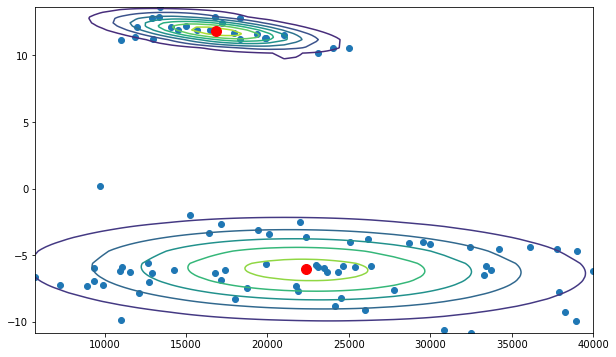

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.sort(X_features[:,0]), np.sort(X_features[:,1]))
XY = np.array([x.flatten(), y.flatten()]).T

fig = plt.figure(figsize = (10,6))
ax0 = fig.add_subplot(111)
ax0.scatter(X_features[:,0], X_features[:,1])
for m,c in zip(means, covariances):
    multi_normal = multivariate_normal(mean = m, cov = c)
    ax0.contour(np.sort(X_features[:,0]), np.sort(X_features[:,1]), multi_normal.pdf(XY).reshape(len(X_features), len(X_features)))
    ax0.scatter(m[0] ,m[1], c = 'red', zorder = 10, s = 100)
plt.show()    

### <font color=blue>4. Gaussian HMM</font><br> ###

__1. Write the Transition Matrix and Emission Matrix__<br><br>
__2. What is the probability of <font color=green>Sunny, Rainy, Rainy, Rainy, Snowy, Snowy</font>? (No need to code!)__<br><br>
__3. Suppose that a man wore <font color=green>Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat</font>. What is the most likely weather condition in these 7 consecutive days?__

In [24]:
pip install --upgrade --user hmmlearn

Requirement already up-to-date: hmmlearn in c:\users\asus\appdata\roaming\python\python38\site-packages (0.2.4.post4+g4ea11b0)
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --user git+https://github.com/hmmlearn/hmmlearn

  Cloning https://github.com/hmmlearn/hmmlearn to c:\users\asus\appdata\local\temp\pip-req-build-8tu3f_9m
  Created wheel for hmmlearn: filename=hmmlearn-0.2.4.post4+g4ea11b0-cp38-cp38-win_amd64.whl size=110896 sha256=54dda58efa9aee3be621bfc78fe451d90d2bd52a9acd269e2deb1d4a4abbaa46
  Stored in directory: C:\Users\Asus\AppData\Local\Temp\pip-ephem-wheel-cache-12paphmq\wheels\6e\5c\0a\3723e3e0ece849baa8834f15296140af48ebef347142bf045d
Successfully built hmmlearn
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/hmmlearn/hmmlearn 'C:\Users\Asus\AppData\Local\Temp\pip-req-build-8tu3f_9m'


In [26]:
import numpy as np
from hmmlearn import hmm

states = ["Sunny", "Rainy", "Snowy"]
n_states = len(states)

observations = ["T-shirt", "Coat", "Umbrella"]
n_observations = len(observations)

In [27]:
model = hmm.MultinomialHMM(n_components = n_states, init_params = "", params = "")

model.startprob_ = np.array([0.7 , 0.25 , 0.05])

model.transmat_ = np.array([
    [0.8, 0.15, 0.05] ,
    [0.38, 0.6, 0.02], 
    [0.75, 0.05, 0.2]])

model.emissionprob_ = np.array([
    [0.6 , 0.3, 0.1],
    [0.05, 0.3, 0.65],
    [0, 0.5, 0.5]])

P(Sunny) * P(Rainy|Sunny) * P(Rainy|Rainy) * P(Rainy|Rainy) * P(Snowy|Rainy) * P(Snowy|Snowy) = 0.7 * 0.15 * 0.6 * 0.6 * 0.02 * 0.2 = 0.000151

In [28]:
sto = np.array([[1, 1, 2, 2, 0, 2, 1]]).T

model = model.fit(sto)
logprob , hs = model.decode(sto, algorithm = "viterbi")
print("Observations: " , sto.T)
print("States:" , hs)

print("Clothes are:", ", ".join(map(lambda x : observations[int(x)] ,sto)))
print("States are:", ", ".join(map(lambda x : states[int(x)], hs)))

Observations:  [[1 1 2 2 0 2 1]]
States: [1 1 1 1 0 0 0]
Clothes are: Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat
States are: Rainy, Rainy, Rainy, Rainy, Sunny, Sunny, Sunny
